# Matin Ghorbani 6.5.Assignment
---

## Import Dependencies

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from lls import LinearLeastSquare
from train_test_split import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Import The Dataset

In [2]:
data = pd.read_csv('HousePrice.csv')
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


## Preprocess data and update dollar price to july 2023.

### Removing the duplicates dates

In [3]:
data.drop_duplicates(inplace=True)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


### Removing the null dates

In [4]:
data.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [5]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


### Conversion of 30 tomans dollars to 50 tomans

In [6]:
data['Price(USD)'] = data['Price(USD)'] * (50 / 30)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,102777.783333
1,60,1,True,True,True,Shahran,1.850000e+09,102777.783333
2,79,2,True,True,True,Pardis,5.500000e+08,30555.550000
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,50138.883333
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,388888.883333


## Convert every non-number feature to number 

In [7]:
data['Parking'].replace([True, False], [1, 0], inplace=True)
data['Warehouse'].replace([True, False], [1, 0], inplace=True)
data['Elevator'].replace([True, False], [1, 0], inplace=True)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,102777.783333
1,60,1,1,1,1,Shahran,1.850000e+09,102777.783333
2,79,2,1,1,1,Pardis,5.500000e+08,30555.550000
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,50138.883333
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,388888.883333


### Show the address of the 5 most expensive houses

In [8]:
sorted_df = data.sort_values(by='Price', ascending=False)
top_5_expensive_houses = sorted_df.head(5)
top_5_expensive_houses = top_5_expensive_houses[['Address', 'Price']]
top_5_expensive_houses

,Address,Price
1606,Zaferanieh,9.240000e+10
1704,Abazar,9.100000e+10
405,Lavasan,8.500000e+10
770,Ekhtiarieh,8.160000e+10
1249,Niavaran,8.050000e+10


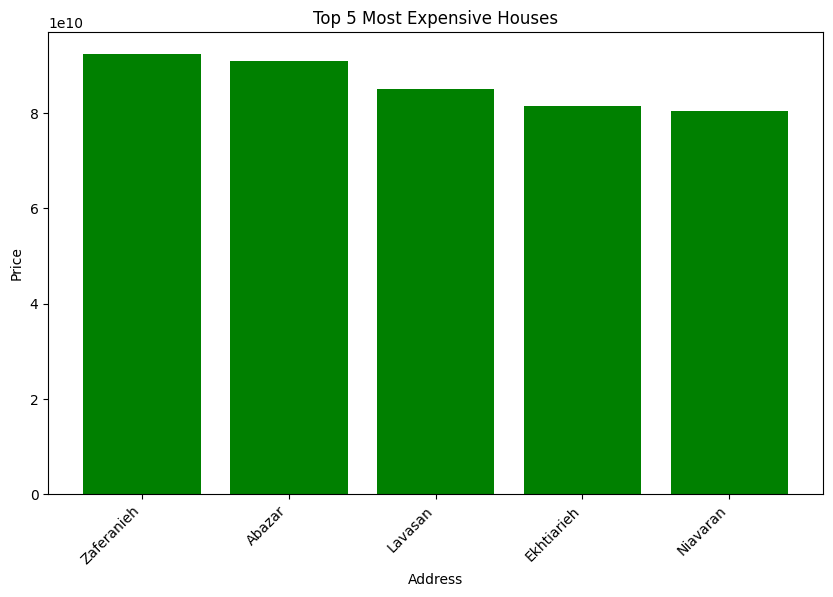

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_expensive_houses['Address'], top_5_expensive_houses['Price'], color='green')
plt.xlabel('Address')
plt.ylabel('Price')
plt.title('Top 5 Most Expensive Houses')
plt.xticks(rotation=45, ha='right')
plt.show()

## Use all possible features for X_train

In [10]:
data.drop(['Address'], inplace=True, axis=1)
data.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.670121,0.200009,0.072364,0.047034,0.720935,0.720935
Room,0.670121,1.000000,0.278743,0.125894,0.181826,0.569738,0.569738
Parking,0.200009,0.278743,1.000000,0.429241,0.428801,0.193761,0.193761
Warehouse,0.072364,0.125894,0.429241,1.000000,0.205098,0.109370,0.109370
Elevator,0.047034,0.181826,0.428801,0.205098,1.000000,0.110310,0.110310
Price,0.720935,0.569738,0.193761,0.109370,0.110310,1.000000,1.000000
Price(USD),0.720935,0.569738,0.193761,0.109370,0.110310,1.000000,1.000000


In [11]:
data.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,63,1,1,1,1,1.850000e+09,102777.783333
1,60,1,1,1,1,1.850000e+09,102777.783333
2,79,2,1,1,1,5.500000e+08,30555.550000
3,95,2,1,1,1,9.025000e+08,50138.883333
4,123,2,1,1,1,7.000000e+09,388888.883333


In [12]:
X = np.array([data['Area'], data['Room'], data['Parking']]).T
Y = np.array(data['Price'])

## Split our dataset to train and test with train_test_split function

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

print(f'x_train shape is {x_train.shape}')
print(f'x_test shape is {x_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_test shape is {y_test.shape}')


x_train shape is (2593, 3)
x_test shape is (649, 3)
y_train shape is (2593,)
y_test shape is (649,)


## Fit the LLS model on our training dataset

In [14]:
lls = LinearLeastSquare()
lls.fit(x_train, y_train)

## Evaluate our model on our test dataset using MAE, MSE and RMSE loss functions. Why the MSE metric is a very large number?

In [16]:
mae_loss = lls.evaluate(x_test, y_test, metric='mae')
mse_loss = lls.evaluate(x_test, y_test, metric='mse')
rmse_loss = lls.evaluate(x_test, y_test, metric='rmse')
print(f'mae loss is {mae_loss}, mse loss is {mse_loss}, rmse loss is {rmse_loss}')

mae loss is 3033215106.2707553, mse loss is 4.151350891079051e+19, rmse loss is 6443097772.872185


#### MSE is a large number because there is a square in its formula but no square in the other two formulas

## Compare our result with Scikit-Learn's results

### RidegeCV

In [24]:
ridgecv_model = RidgeCV(alphas=tuple(np.logspace(-3, 0, num=4)))
ridgecv_model.fit(x_train, y_train)
y_pred_ridgcv = ridgecv_model.predict(x_test)
mae_ridgcv = mean_absolute_error(y_test, y_pred_ridgcv)
mse_ridgcv = mean_squared_error(y_test, y_pred_ridgcv)
rmse_ridgcv = np.sqrt(mse_ridgcv)

### LinearRegression

In [25]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
Y_pred_linear = linear_model.predict(x_test)
mae_linear = mean_absolute_error(y_test, Y_pred_linear)
mse_linear = mean_squared_error(y_test, Y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

In [28]:
print(f'\nmy mae loss is {mae_loss}, my mse loss is {mse_loss}, my rmse loss is {rmse_loss}\n')
print(f'RidegeCV mae loss is {mae_ridgcv}, RidegeCV mse loss is {mse_ridgcv}, RidegeCV rmse loss is {rmse_ridgcv}\n')
print(
    f'LinearRegression mae loss is {mae_linear}, LinearRegression mse loss is {mse_linear}, LinearRegression rmse loss is {rmse_linear}\n')


my mae loss is 3033215106.2707553, my mse loss is 4.151350891079051e+19, my rmse loss is 6443097772.872185

RidegeCV mae loss is 2767883624.6276884, RidegeCV mse loss is 3.740635402617781e+19, RidegeCV rmse loss is 6116073415.695548

LinearRegression mae loss is 2768052546.693797, LinearRegression mse loss is 3.740361968715422e+19, LinearRegression rmse loss is 6115849874.478135
